In [1]:
from operator import itemgetter
import numpy as np

%pylab inline
np.random.seed(228)

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Cluster:
    begin = 0
    end = 0
    
    def __init__(self, begin, end):
        self.begin = begin
        self.end = end

Алгоритм **single-link HAC** для точек на прямой:

* Расставить точки на прямой.
* Изначально для каждой точки создать отдельный кластер.
* Среди кластеров найти те, которые расположены ближе всего друг к другу.
    * Так как кластеры стоят на одной прямой, то они точно упорядочены. То есть стоят друг за другом.
    * Расстояние между двумя кластерами будем считать как начало второго кластера минус конец первого (очевидно, что это будут ближайшие точки)
* Два ближайших кластера сольём в один, начало установив как начало первого кластера, а конец как конец второго.
* Если кластеров больше, чем нужно, то повторяем предыдущие два пункта до получения желаемого результата.

Проблема этого алгоритма в том, что он найдёт просто два самы больших разрыва между точками и по ним разделит. Он не посмотрит на распределение или на что-либо другое.

Алгоритм не будет работать тогда, когда расстояния между точками изначально одинаковые. То есть расстояния между объектами кластера равны межкластерному расстоянию. Получится, что данный алгоритм поместит все точки, кроме двух последних, в один кластер.

In [3]:
def HAC(X):
    # Сначала каждая точка - отдельный кластер
    clusters = list()
    for point in X:
        clusters.append(Cluster(point, point))
    # Сортируем точки, то есть расставляем их на одну прямую
    clusters = sorted(clusters, key=lambda x: x.begin)
    # Сам алгоритм
    while len(clusters) > 3:
        min_dist = np.inf
        for num_c in range(len(clusters) - 1):
            local_dist = clusters[num_c+1].begin - clusters[num_c].end
            if (local_dist < min_dist):
                min_dist = local_dist
                min_pair = (num_c, num_c+1)
        clusters[min_pair[0]].end = clusters[min_pair[1]].end
        del clusters[min_pair[1]]
    return clusters

# Проверка алгоритма

## Ярко выраженные кластеры

In [4]:
X = np.zeros(300)

X[:100] = np.random.normal(loc=0.0, scale=.1, size=100)
X[100:200] = np.random.normal(loc=1.5, scale=.15, size=100)
X[200:300] = np.random.normal(loc=-1.0, scale=.2, size=100)

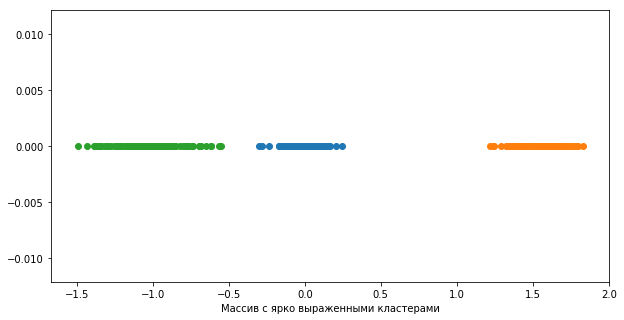

In [5]:
plt.figure(figsize=(10, 5))
plt.xlabel("Массив с ярко выраженными кластерами")
for i in range(3):
    plt.scatter(X[100*i:100*(i+1)], np.zeros(100))
pass

In [6]:
clusterized_X = HAC(X)

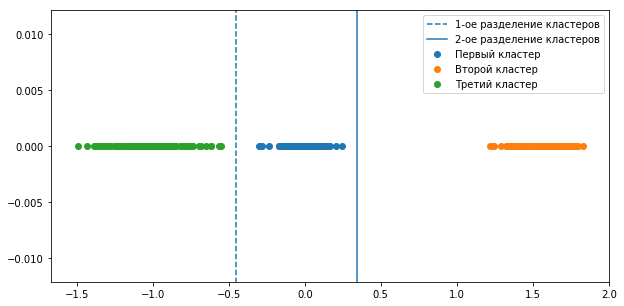

In [7]:
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.scatter(X[100*i:100*(i+1)], np.zeros(100))
plt.axvline(x=clusterized_X[0].end+0.1, ymin=-0.1, ymax=3, linestyle="--")
plt.axvline(x=clusterized_X[1].end+0.1, ymin=-0.1, ymax=3)
plt.legend(["1-ое разделение кластеров", 
            "2-ое разделение кластеров", 
            "Первый кластер", 
            "Второй кластер", 
            "Третий кластер"])
pass

## Случайные точки

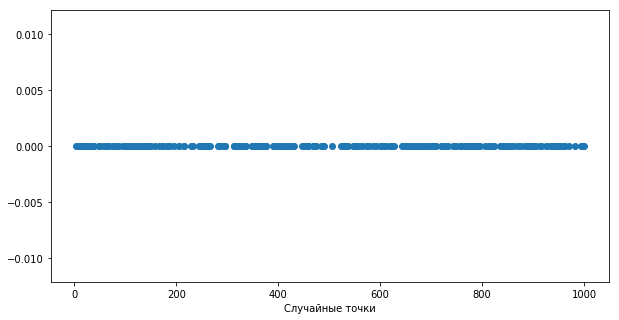

In [8]:
X1 = np.random.choice(1000, 300)

plt.figure(figsize=(10, 5))
plt.xlabel("Случайные точки")
plt.scatter(X1, np.zeros(300))

pass

In [9]:
clusterized_X1 = HAC(X1)

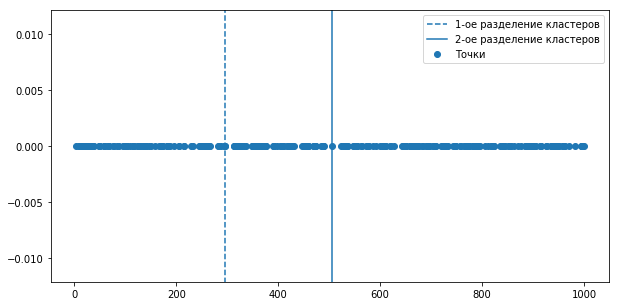

In [10]:
plt.figure(figsize=(10, 5))
plt.scatter(X1, np.zeros(300))
plt.axvline(x=clusterized_X1[0].end+0.5, ymin=-0.1, ymax=3, linestyle="--")
plt.axvline(x=clusterized_X1[1].end+0.5, ymin=-0.1, ymax=3)
plt.legend(["1-ое разделение кластеров", 
            "2-ое разделение кластеров", 
            "Точки"])
pass

## Равные расстояния между точками

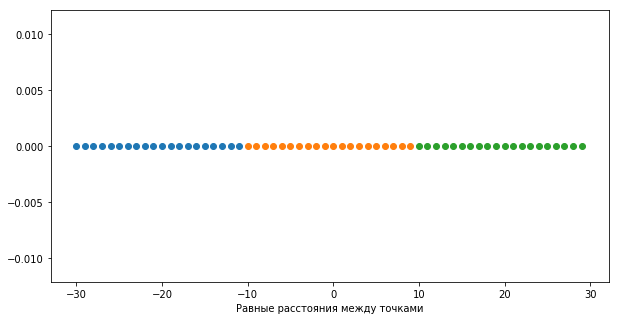

In [11]:
X2 = np.arange(-30, 30, 1)

plt.figure(figsize=(10, 5))
plt.xlabel("Равные расстояния между точками")
for i in range(3):
    plt.scatter(X2[20*i:20*(i+1)], np.zeros(20))
pass

In [12]:
clusterized_X2 = HAC(X2)

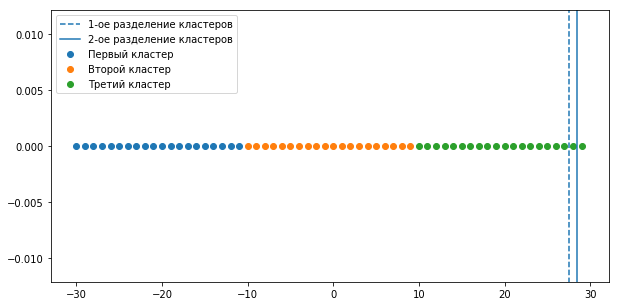

In [13]:
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.scatter(X2[20*i:20*(i+1)], np.zeros(20))
plt.axvline(x=clusterized_X2[0].end+0.5, ymin=-0.1, ymax=3, linestyle="--")
plt.axvline(x=clusterized_X2[1].end+0.5, ymin=-0.1, ymax=3)
plt.legend(["1-ое разделение кластеров", 
            "2-ое разделение кластеров", 
            "Первый кластер", 
            "Второй кластер", 
            "Третий кластер"])
pass